In [13]:
import sys

import numpy as np
import matplotlib.pyplot as plt

import rose

plt.style.use('science')
gr = (1 + np.sqrt(5)) / 2
h = 3

In [14]:
energy = 50 # MeV
theta = np.array([200, -91.85])
training_points = np.array([
    [119.51219512195122, -14.634146341463415],
    [139.02439024390245, -4.878048780487805],
    [158.53658536585365, -48.78048780487805],
    [178.0487804878049, -117.07317073170732],
    [197.5609756097561, -131.70731707317074],
    [217.0731707317073, -126.82926829268293],
    [236.58536585365854, -82.92682926829268],
    [256.0975609756098, -175.609756097561],
    [275.609756097561, -19.51219512195122],
    [295.1219512195122, -170.73170731707316]
])

In [15]:
s_mesh = np.linspace(1e-6, 4*2*np.pi, 2000)

rbe = rose.ReducedBasisEmulator(
    rose.interaction.Optical_Potential,
    training_points,
    energy,
    0,
    n_basis = 4
)

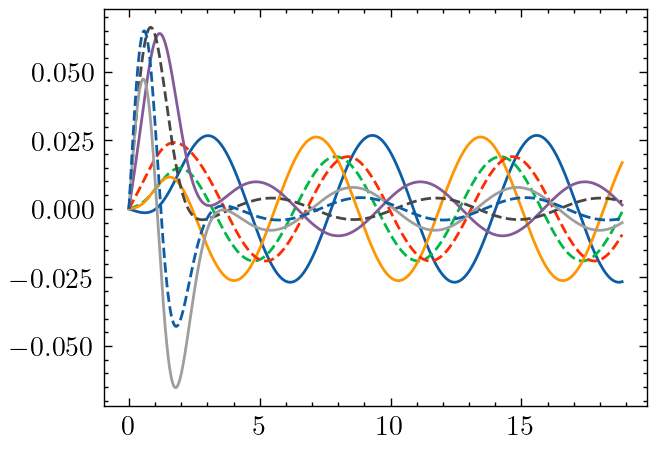

In [16]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in rbe.basis.vectors.T:
    ax.plot(rbe.s_mesh, np.real(row))
    ax.plot(rbe.s_mesh, np.imag(row), linestyle='--')

In [17]:
%%time
phi_hat = rbe.emulate_wave_function(theta)

CPU times: user 8.95 ms, sys: 3.71 ms, total: 12.7 ms
Wall time: 1.11 ms


In [18]:
%%time
phi_exact = rbe.se.phi(energy, theta, rbe.s_mesh, 0, solve_se_dict=dict(phi_0=0+0j, phi_prime_0=1+1j))

CPU times: user 218 ms, sys: 5.92 ms, total: 224 ms
Wall time: 123 ms


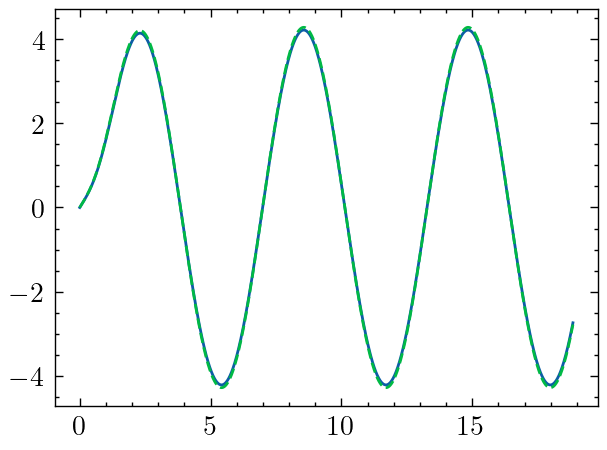

In [19]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')
ax.plot(rbe.s_mesh, np.real(phi_hat))
ax.plot(rbe.s_mesh, np.real(phi_exact), linestyle='--');

In [20]:
# rose.metrics.run_metrics(rbe, 'benchmark_data_MN_Potential_E_50.00_MeV.pkl', verbose=True);

In [21]:
%%time
rbe.emulate_phase_shift(theta)

CPU times: user 1.02 ms, sys: 99 µs, total: 1.11 ms
Wall time: 206 µs


(-0.7073600448453745+1.734723475976807e-17j)

In [22]:
%%time
rose.free_solutions.phase_shift_interp(np.real(rbe.emulate_wave_function(theta)), rbe.s_mesh, 0, rbe.s_0)

CPU times: user 5.51 ms, sys: 1.28 ms, total: 6.78 ms
Wall time: 1.76 ms


(-0.7073600446579486-5.898059818321144e-17j)

In [23]:
%%time
rose.free_solutions.phase_shift_interp(np.real(rbe.se.phi(energy, theta, rbe.s_mesh, 0,
    solve_se_dict=dict(phi_0=0+0j, phi_prime_0=1+1j))), rbe.s_mesh, 0, rbe.s_0)

CPU times: user 233 ms, sys: 2.81 ms, total: 236 ms
Wall time: 88.5 ms


(-0.7074100401460846+3.2959746043559335e-17j)

In [24]:
rbe.basis.singular_values

array([5.49225697e+02, 9.22688611e+01, 5.93732927e+00, 5.98745914e-01,
       4.73311062e-02, 3.19845526e-03, 5.00698491e-04, 3.90561706e-05,
       1.38547238e-06, 8.15778789e-08])